In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [3]:
!pip install nilearn

     |████████████████████████████████| 3.0MB 9.6MB/s 


In [4]:
from nilearn import datasets
# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()
# 'func' is a list of filenames: one for each subject
fmri_filename = haxby_dataset.func[0]

# print basic information on the dataset
print('First subject functional nifti images (4D) are at: %s' %
      fmri_filename)  # 4D data


Dataset created in /root/nilearn_data/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


Downloaded 290463744 of 291168628 bytes (99.8%,    0.3s remaining) ...done. (116 seconds, 1 min)
Extracting data from /root/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz...

First subject functional nifti images (4D) are at: /root/nilearn_data/haxby2001/subj2/bold.nii.gz


.. done.


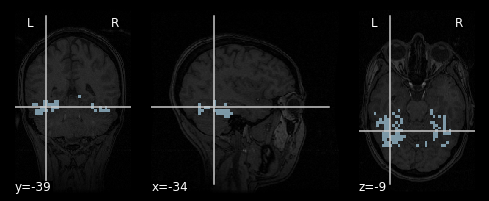

In [5]:
mask_filename = haxby_dataset.mask_vt[0]

# Let's visualize it, using the subject's anatomical image as a
# background
from nilearn import plotting
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0],
                 cmap='Paired')

In [6]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_filename, standardize=True)

# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_filename)

In [7]:
print(fmri_masked)

[[ 7.6757896e-01  2.3108697e+00 -2.0519443e-01 ... -1.0261143e+00
   8.7993503e-02  2.0720518e+00]
 [ 5.5640817e-01  1.6833434e+00 -2.4644937e-01 ... -7.0238107e-01
  -3.4570047e-01  2.0341001e+00]
 [ 7.6757896e-01  1.9186659e+00  1.0802225e-03 ... -9.9374104e-01
  -2.7630943e-01  2.1479552e+00]
 ...
 [-4.2905563e-01 -1.6896105e+00 -7.4150854e-01 ... -1.5440876e+00
   1.8054217e+00 -1.6709718e-01]
 [-1.4749455e-01 -1.8072717e+00 -2.4644937e-01 ... -1.7707009e+00
   1.5452052e+00  7.8169477e-01]
 [-2.1788482e-01 -1.4542881e+00  1.0802225e-03 ... -1.6412076e+00
   1.2676411e+00  8.9554977e-01]]


In [8]:
print(fmri_masked.shape)

(1452, 464)


In [9]:
import pandas as pd
# Load behavioral information
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
print(behavioral)

     labels  chunks
0      rest       0
1      rest       0
2      rest       0
3      rest       0
4      rest       0
...     ...     ...
1447   rest      11
1448   rest      11
1449   rest      11
1450   rest      11
1451   rest      11

[1452 rows x 2 columns]


In [10]:
conditions = behavioral['labels']
print(conditions)

0       rest
1       rest
2       rest
3       rest
4       rest
        ... 
1447    rest
1448    rest
1449    rest
1450    rest
1451    rest
Name: labels, Length: 1452, dtype: object


In [11]:
condition_mask = conditions.isin(['face', 'cat'])

# We apply this mask in the sampe direction to restrict the
# classification to the face vs cat discrimination
fmri_masked = fmri_masked[condition_mask]

In [13]:
fmri_masked.shape

(216, 464)

In [14]:
conditions = conditions[condition_mask]
print(conditions.shape)

(216,)


In [15]:
conditions

21      face
22      face
23      face
24      face
25      face
        ... 
1427     cat
1428     cat
1429     cat
1430     cat
1431     cat
Name: labels, Length: 216, dtype: object

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
print(svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [17]:
svc.fit(fmri_masked, conditions)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
prediction = svc.predict(fmri_masked)
print(prediction)

['face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'face' 'face' 'face' 'face' 'face' 'face' 'face' '

In [19]:
print((prediction == conditions).sum() / float(len(conditions)))

1.0


In [20]:
svc.fit(fmri_masked[:-30], conditions[:-30])

prediction = svc.predict(fmri_masked[-30:])
print((prediction == conditions[-30:]).sum() / float(len(conditions[-30:])))

0.6666666666666666


In [21]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

# The "cv" object's split method can now accept data and create a
# generator which can yield the splits.
for train, test in cv.split(X=fmri_masked):
    conditions_masked = conditions.values[train]
    svc.fit(fmri_masked[train], conditions_masked)
    prediction = svc.predict(fmri_masked[test])
    print((prediction == conditions.values[test]).sum()
           / float(len(conditions.values[test])))

0.9772727272727273
0.7674418604651163
0.7906976744186046
0.5348837209302325
0.7441860465116279


In [22]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(svc, fmri_masked, conditions)
print(cv_score)

[0.86363636 0.76744186 0.74418605 0.69767442 0.81395349]


In [23]:
session_label = behavioral['chunks'][condition_mask]

# By default, cross_val_score uses a 3-fold KFold. We can control this by
# passing the "cv" object, here a 5-fold:
cv_score = cross_val_score(svc, fmri_masked, conditions, cv=cv)
print(cv_score)

# To leave a session out, pass it to the groups parameter of cross_val_score.
from sklearn.model_selection import LeaveOneGroupOut
cv = LeaveOneGroupOut()
cv_score = cross_val_score(svc,
                           fmri_masked,
                           conditions,
                           cv=cv,
                           groups=session_label,
                           )
print(cv_score)

[0.97727273 0.76744186 0.79069767 0.53488372 0.74418605]
[0.55555556 1.         0.66666667 0.66666667 0.77777778 0.72222222
 0.88888889 0.38888889 0.66666667 0.5        0.77777778 0.66666667]


In [24]:
coef_ = svc.coef_
print(coef_)

[[-4.10657595e-02 -8.37167472e-04 -2.35012681e-02 -3.47466593e-02
   3.44083769e-02  2.59066801e-02  2.39041211e-02 -4.95035653e-02
  -3.19460172e-02 -1.65914681e-02  1.87562204e-02 -7.79177473e-03
   1.02056249e-02 -3.23105903e-02  4.77763023e-03  2.20189250e-02
   1.50937850e-02  1.77028568e-03  2.41596556e-02 -3.24642432e-02
   1.30986111e-02 -9.66189754e-02 -7.07527856e-02  1.92783989e-02
   3.57743244e-02 -1.43958701e-02 -9.17680596e-03 -3.23610899e-02
   2.34852610e-02  1.01924891e-01  1.61408709e-02 -7.79734301e-02
   2.50118393e-03 -3.13776651e-02 -2.80087685e-02 -5.16147217e-02
  -6.94852906e-03 -1.00571543e-02 -2.96089438e-02 -2.25490359e-02
  -3.00422548e-02 -3.28099135e-02  2.65749798e-02  1.66034820e-02
  -1.63207805e-02  3.33134845e-02  4.61645555e-04  7.31156716e-03
   2.85303954e-02  1.98786965e-02  2.65797203e-02  1.87621215e-02
  -2.05313506e-02 -9.08390464e-03 -4.53161747e-02  1.59157705e-02
  -1.75423001e-02 -6.90779058e-02  3.89529758e-02 -1.28827269e-01
  -3.50347

In [25]:
print(coef_.shape)

(1, 464)


In [26]:
coef_img = masker.inverse_transform(coef_)
print(coef_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (40, 64, 64, 1)
affine: 
[[  -3.5      0.       0.      68.25 ]
 [   0.       3.75     0.    -118.125]
 [   0.       0.       3.75  -118.125]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 4 40 64 64  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.    3.5   3.75  3.75  1.    1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_f

In [27]:
coef_img.to_filename('haxby_svc_weights.nii.gz')

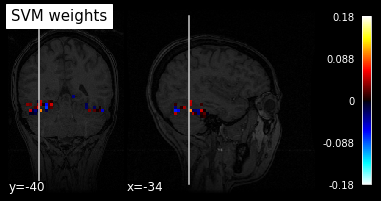

In [28]:
from nilearn.plotting import plot_stat_map, show

plot_stat_map(coef_img, bg_img=haxby_dataset.anat[0],
              title="SVM weights", display_mode="yx")

show()

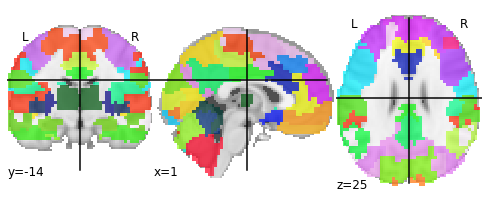

In [51]:
from nilearn import plotting

plotting.plot_roi(atlas_filename)